# Gradients

Understanding gradients will allow us to eventually understand edge detection which we will use later on, since its an important aspect of object detection in general.
Make sure to watch the lecture video for the full overview!

In [29]:
# import cv2, numpy and matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# read sudoku image
img = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)


In [31]:
# create displqy_img(img) that takes an img as input and display it
def display_img(img):
    plt.imshow(img, cmap='gray')
    plt.show()

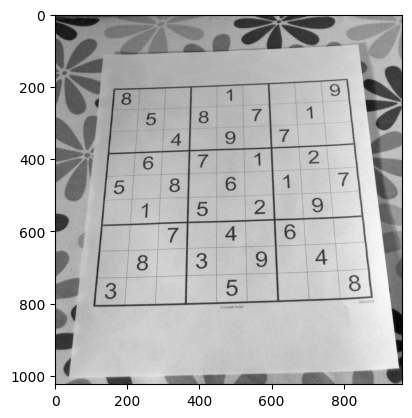

In [32]:
# call display_img function to display the img
display_img(img)

In [33]:
# use Sobel function twise for x and y axis
# use laplacian function to apply the laplacian operation on the img
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(img, cv2.CV_64F)


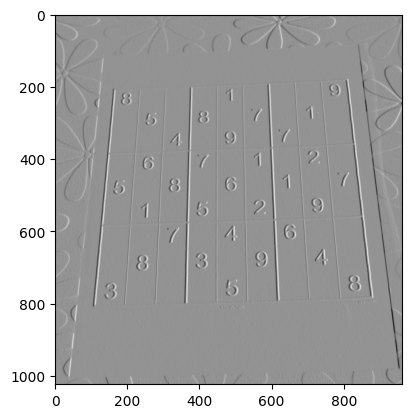

In [34]:
# display_img sobelx
display_img(sobelx)

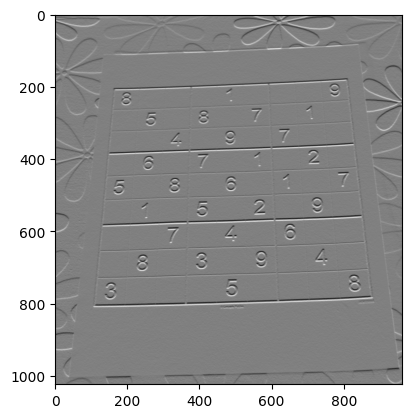

In [35]:
# display_img sobely
display_img(sobely)

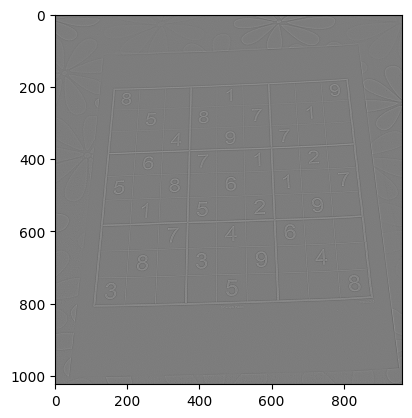

In [36]:
# display_img laplacian
display_img(laplacian)

## Combining Previous Ideas

Let's play around with these images with some of the other ideas we've already seen!

### Blending Images

In [37]:
# use addweighted function to blend sobelx and sobely with alpha=0.5, beta=0.5, gamma=0
blend = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

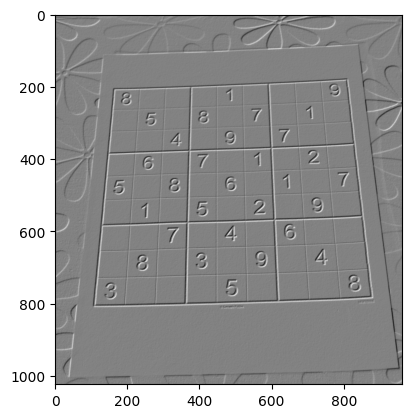

In [38]:
# display_img blended
display_img(blend)

In [39]:
# show the shape of the blended image
print(blend.shape)

(1024, 962)


### Morphological Operators

In [40]:
# create 4x4 ones kernel
# apply morphologyEx function with morph_gradient parameter and the kernel

kernel = np.ones((4, 4), np.uint8)
gradient = cv2.morphologyEx(blend, cv2.MORPH_GRADIENT, kernel)


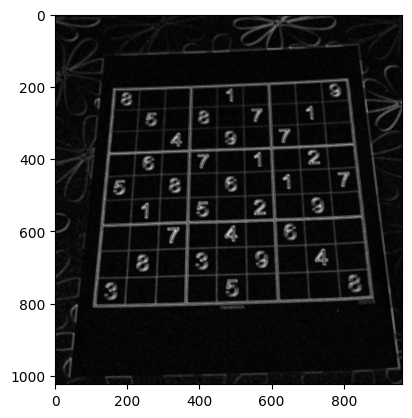

In [41]:
# display_img gradient
display_img(gradient)

Try it on the laplacian result!

In [42]:
# create 3x3 ones kernel
# apply morphologyEx function with morph_gradient parameter and the kernel to create the gradient of the original img

kernel = np.ones((3, 3), np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

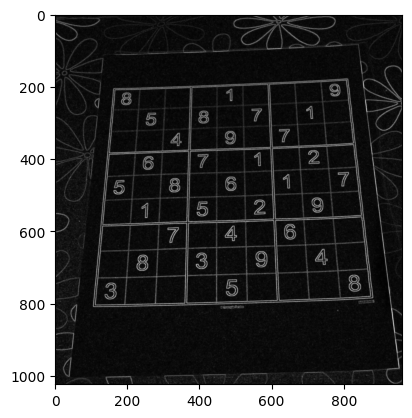

In [43]:
# display_img (gradient)
display_img(gradient)

### Thresholds

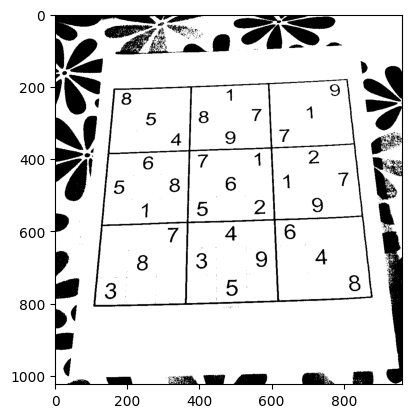

In [44]:
# Apply threashold function with THRESH_BINARY param on the original image and display the returned image
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
display_img(thresh1)

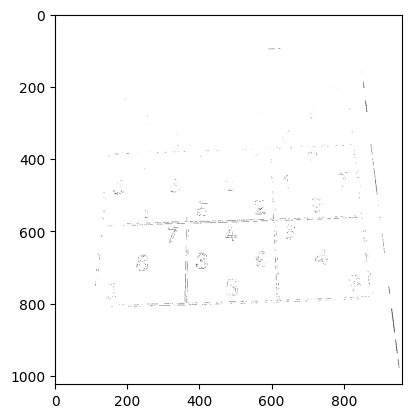

In [48]:
# Apply threashold function with THRESH_BINARY param on the gradient image and display the returned image

ret, thresh2 = cv2.threshold(gradient, 127, 255, cv2.THRESH_BINARY_INV)
display_img(thresh2)

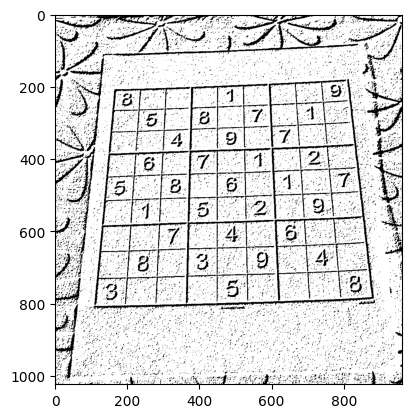

In [47]:
# Apply threashold function with THRESH_BINARY param on the blended image and display the returned image

ret, thresh3 = cv2.threshold(blend, 127, 255, cv2.THRESH_BINARY_INV)
display_img(thresh3)